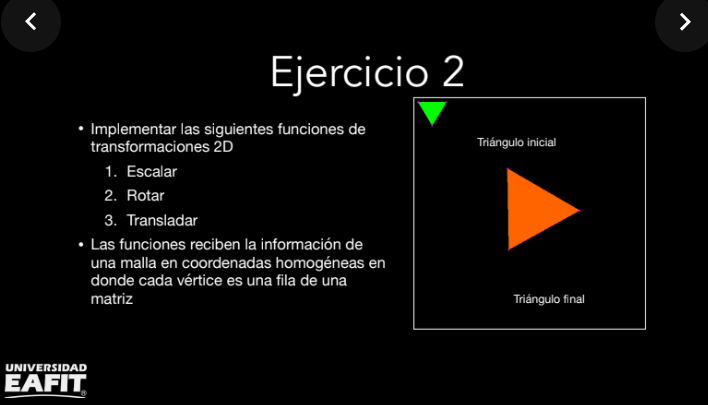

In [ ]:
from google.colab.patches import cv2_imshow
import numpy as np
import cv2

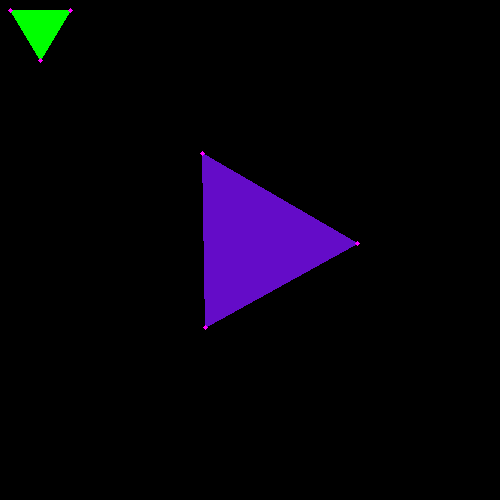

In [ ]:
def draw_triangle(im, triangle, color=(0, 255, 0)):
    # Normalizar coordenadas homogéneas
    triangle = np.array([v[:-1] / v[-1] for v in triangle], np.uint16)
    cv2.drawContours(im, [triangle.astype(int)], 0, color, -1)
    for v in triangle:
        cv2.circle(im, tuple(v), 2, (255, 0, 255), -1)

def scale(vertex, sx, sy):
    S = np.array([[sx, 0, 0],
                  [0, sy, 0],
                  [0, 0, 1]])
    return S @ vertex

def rotate(vertex, a):
    angulo = np.radians(a)
    c, s = np.cos(angulo), np.sin(angulo)
    R = np.array([[c, -s, 0],
                  [s, c, 0],
                  [0, 0, 1]])
    return R @ vertex

def translate(vertex, dx, dy):
    T = np.array([[1, 0, dx],
                  [0, 1, dy],
                  [0, 0, 1]])
    return T @ vertex

# Tamaño de la imagen
w = 500
h = 500
im = np.zeros((h, w, 3), np.uint8)

# Parámetros
angle = 30
s = 3
t = 250

# triángulo original
triangle1 = np.array([[10, 10, 1], [70, 10, 1], [40, 60, 1]])

# transformaciones triángulo 2
triangle2 = translate(rotate(scale(translate(triangle1.T, -40, -30), s, s), angle), t, t)

# Dibujar 2
draw_triangle(im, triangle1)
draw_triangle(im, triangle2.T, color=(200, 12, 100))

cv2_imshow(im)

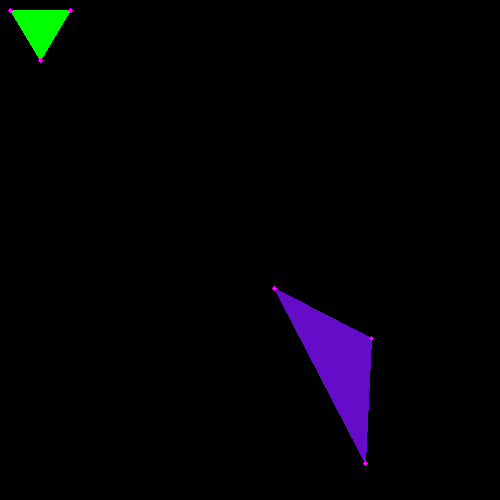

In [ ]:


def draw_triangle(im, triangle, color=(0,255,0)):
    # Normalizar coordenadas homogeneas
    triangle = np.array([ v[:-1]/v[-1] for v in triangle] , np.uint16)
    cv2.drawContours(im, [triangle.astype(int)], 0, color, -1)
    for v in triangle:
        cv2.circle(im, tuple(v), 2, (255,0,255),-1)

def scale(vertex, sx, sy):
    M = np.array([[sx,0,0], [0,sy,1], [0,0,1]]) # Pass a single list of lists as the argument to np.array()
    res = M @ vertex.T # Use .T for transpose
    return res.T # Use .T for transpose

def rotate(vertex, a):
    pass

def compuesta(vertex, dx, dy, sx, sy):
    M = np.array([[sx*np.cos(a),np.sin(a),dx], [np.sin(a),sy*1,dy], [0,0,1]]) # Removed np and replaced it with 1 assuming you wanted to perform scalar multiplication
    res = M @ vertex.T
    return res.T

# image size
w = 500
h = 500
im = np.zeros((h,w,3), np.uint8)
# # Parametros de las transformaciones
# # Traslada a centro y realiza escala y rotacion
a = 1
s = 3
t = 250
# # Sistema coordenado de imagenes
triangle1 = np.array( [[10,10,1], [70,10,1], [40, 60,1]])
# triangle2 = translate(rotate( scale(translate(triangle1, -40,-30),s,s) ,angle), t,t)
triangle2 = compuesta(triangle1, t, t, s,s)
draw_triangle(im, triangle1)
draw_triangle(im, triangle2, color=(200, 12, 100))

cv2_imshow(im)